In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data = pd.read_csv('housing.csv')

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [62]:
data.dropna(inplace=True)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = data.drop(['median_house_value'],axis = 1)
Y = data['median_house_value']

In [13]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [67]:
train_data = X_train.join(y_train)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14759,-117.06,32.56,17.0,2803.0,683.0,2768.0,676.0,1.7958,NEAR OCEAN,140400.0
8802,-118.38,33.79,32.0,10445.0,1620.0,4474.0,1576.0,7.7042,NEAR OCEAN,500001.0
15303,-117.36,33.17,24.0,2046.0,442.0,812.0,367.0,2.3182,NEAR OCEAN,500001.0
19190,-122.68,38.44,29.0,2796.0,588.0,1346.0,562.0,2.9107,<1H OCEAN,169700.0
8060,-118.20,33.85,46.0,1854.0,462.0,1360.0,429.0,2.4844,<1H OCEAN,158200.0
...,...,...,...,...,...,...,...,...,...,...
9344,-122.57,37.99,38.0,5587.0,996.0,2466.0,1027.0,4.1711,NEAR BAY,336900.0
7931,-118.06,33.84,26.0,6960.0,1454.0,4367.0,1437.0,4.7953,<1H OCEAN,210900.0
246,-122.21,37.78,47.0,881.0,248.0,753.0,241.0,2.6250,NEAR BAY,111300.0
7537,-118.21,33.91,24.0,1545.0,391.0,1807.0,388.0,2.6429,<1H OCEAN,105300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

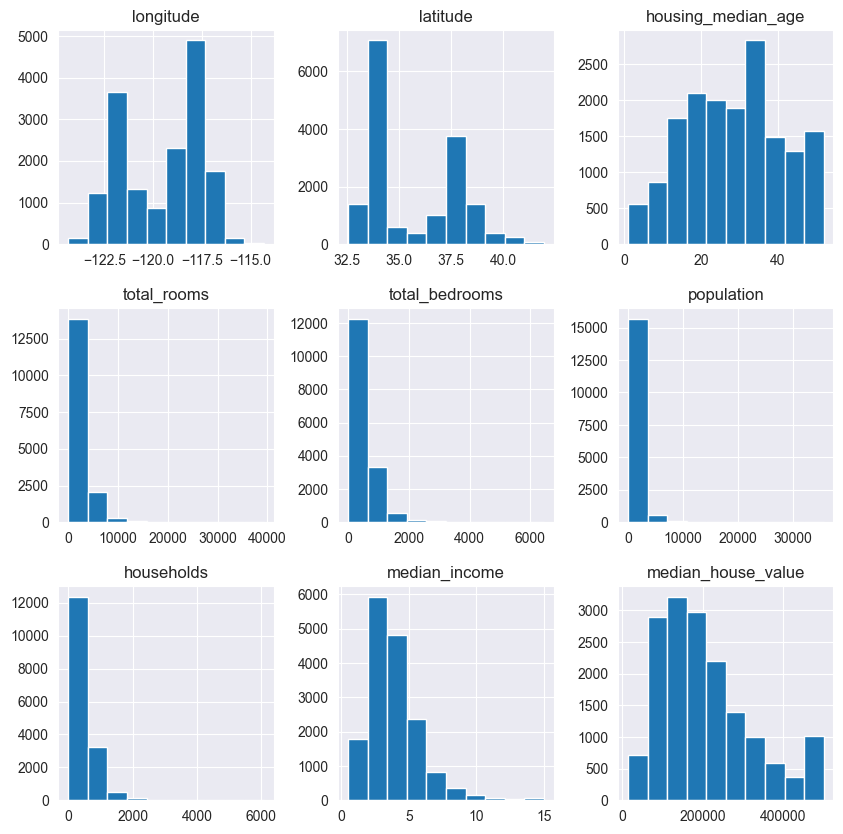

In [18]:
train_data.hist(figsize=(10,10))

<Axes: >

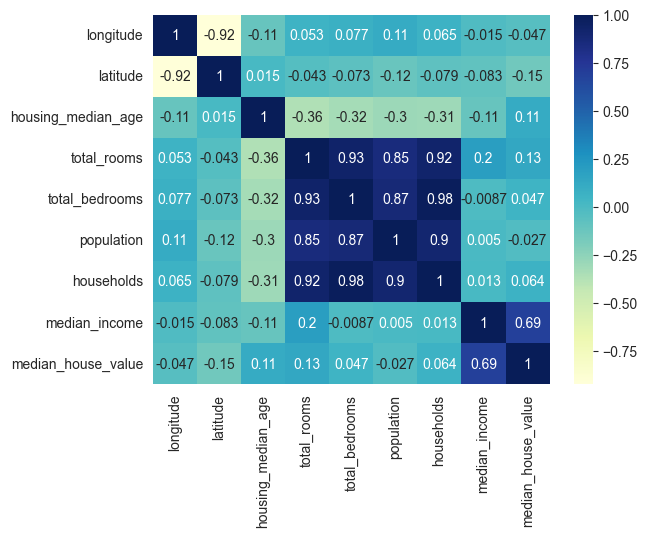

In [24]:
sns.heatmap(train_data.drop(['ocean_proximity'],axis=1).corr(), annot=True, cmap='YlGnBu')

In [68]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

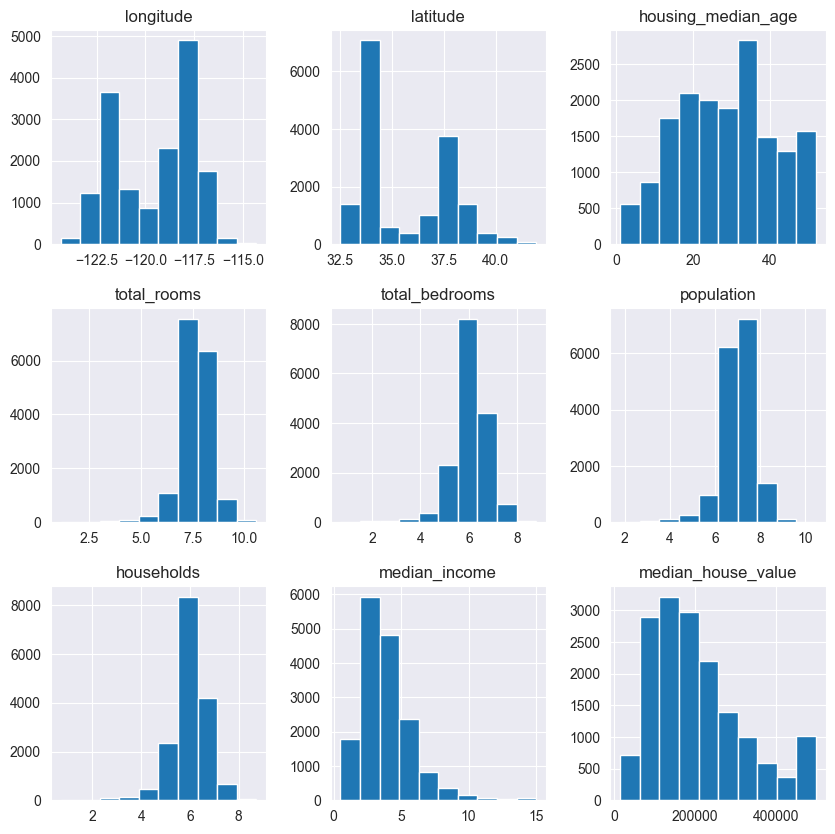

In [27]:
train_data.hist(figsize=(10,10))

In [28]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7216
INLAND        5219
NEAR OCEAN    2087
NEAR BAY      1821
ISLAND           3
Name: count, dtype: int64

In [69]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

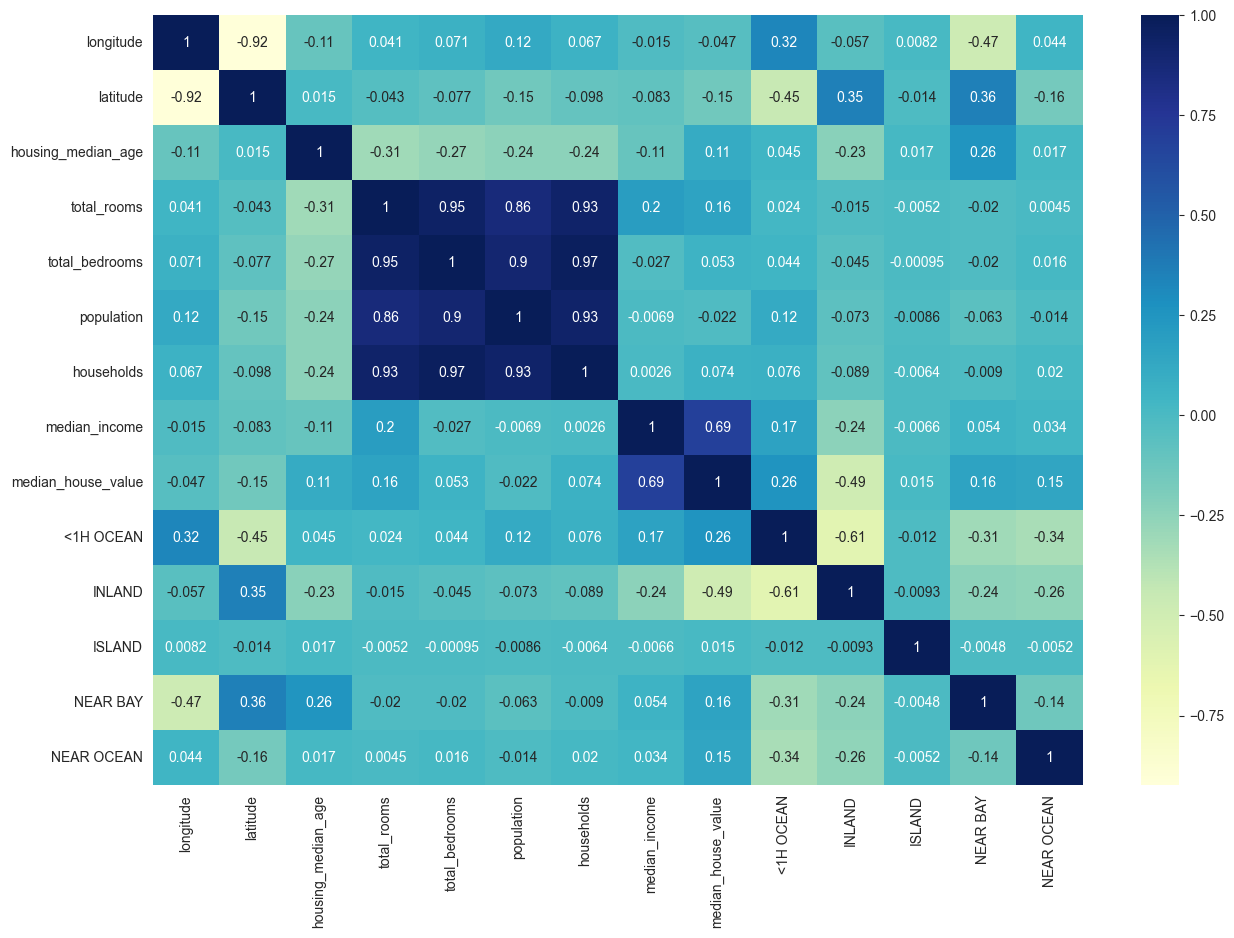

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

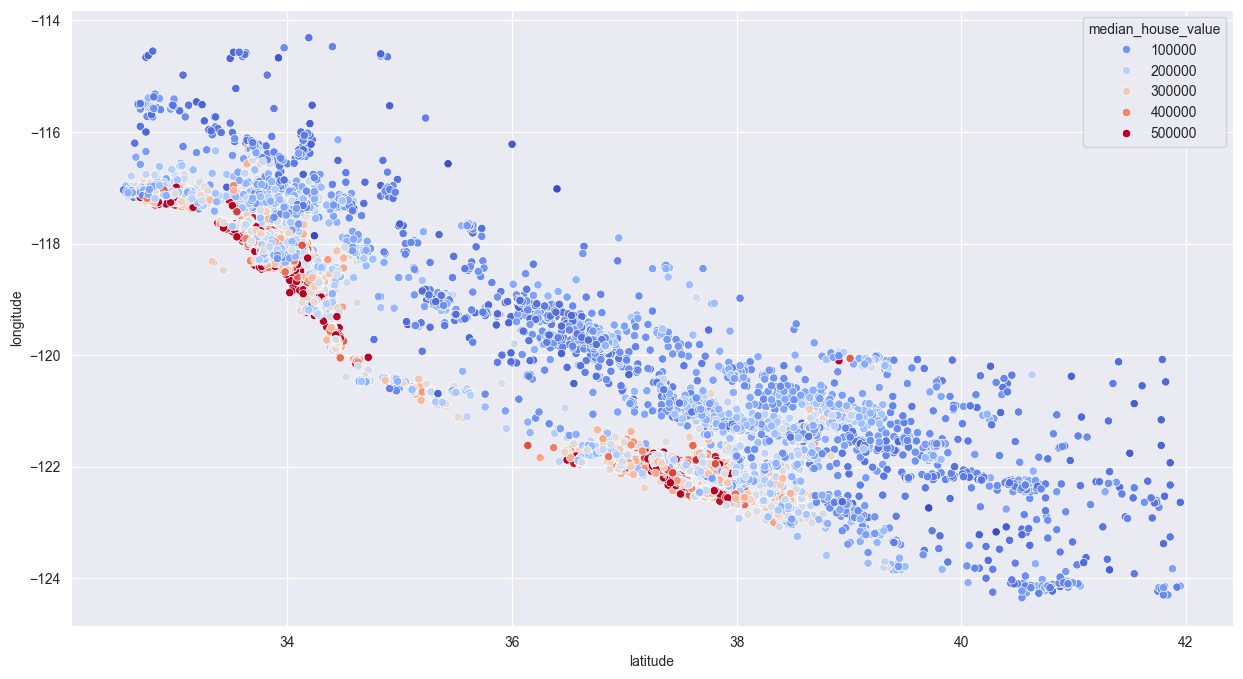

In [36]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'latitude',y = 'longitude', data = train_data, hue = 'median_house_value', palette = 'coolwarm')

In [70]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

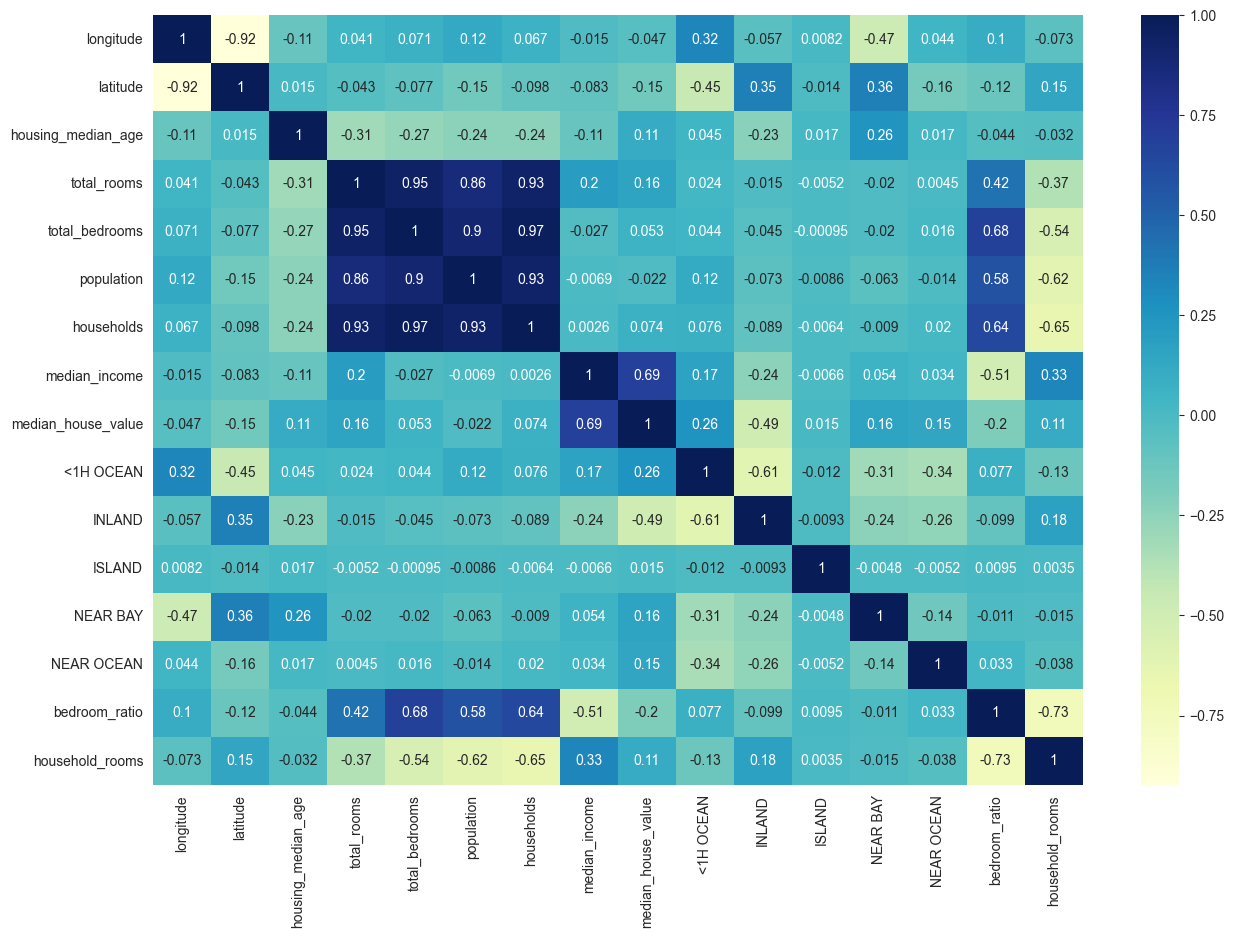

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

reg = LinearRegression()

In [72]:
X_train = scaler.fit_transform(X_train)

In [81]:
reg.fit(X_train, y_train)

LinearRegression()

In [74]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']   

In [75]:
X_test, y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [76]:
X_test_s = scaler.fit_transform(X_test)

In [82]:
reg.score(X_test, y_test)

0.6847851116295909

In [83]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

In [84]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [85]:
forest.score(X_test, y_test)

0.8256519580419723

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [2, 4],
    'min_samples_split': [None, 4, 8],
}

grid_search = GridSearchCV(estimator = forest, param_grid = param_grid,cv=5,scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

C:\Users\Korisnik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Korisnik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Korisnik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Korisnik\AppData\Local\Programs\Python\Python312\Lib\site-packages\skl

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4],
                         'min_samples_split': [None, 4, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [90]:
best_forest = grid_search.best_estimator_

In [91]:
best_forest.score(X_test, y_test)

0.8214477801028351